<a href="https://colab.research.google.com/github/antahiap/dsr-b35/blob/main/dsr-cv/notebooks/07_fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
import tensorflow as tf
import numpy as np

In [3]:
(dataset_train_original, dataset_validate_original, dataset_test_original), info = tfds.load(
    "fashion_mnist",
    split=['train', 'test[:50%]', 'test[50%:]'],
    as_supervised=True,
    with_info=True
)
info

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteSXKP1M/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteSXKP1M/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_path=PosixGPath('/tmp/tmpdcvsde8ttfds'),
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao a

# Labels

| Label| 	Description |
| :---        |          ---: |
| 0 	|T-shirt/top |
| 1 	|Trouser |
| 2 	|Pullover |
| 3 	|Dress |
| 4 	|Coat |
| 5 	|Sandal |
| 6 	|Shirt |
| 7 	|Sneaker |
| 8 	|Bag |
| 9 	|Ankle boot |



(28, 28, 1) <dtype: 'uint8'>


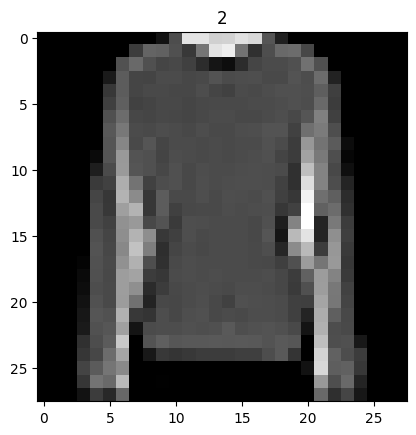

In [29]:
for image, label in dataset_train_original.shuffle(100).take(1):
  print(image.shape, image.dtype)
  plt.imshow(image, cmap='gray')
  plt.title(f"{label}")
  plt.show()

# Data Piplines

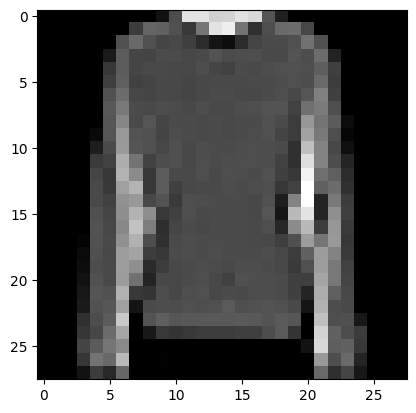

In [31]:
def encode(image, label):
  image = tf.image.convert_image_dtype(image, dtype=tf.float32)
  return image, label


dataset = dataset_train_original.map(lambda image, label: encode(image, label))

for image, label in dataset.take(1):
  plt.imshow(image, cmap='gray')
  plt.show()

In [32]:
dataset_train = dataset_train_original.map(lambda image, label: encode(image, label)).cache().shuffle(60_000).batch(128)
dataset_test = dataset_test_original.map(lambda image, label: encode(image, label)).cache().batch(128)
dataset_valid = dataset_test_original.map(lambda image, label: encode(image, label)).cache().batch(128)

# Model
 model comparison: [link](https://paperswithcode.com/sota/image-classification-on-imagenet)

In [34]:
model= models.Sequential()
model.add(layers.Conv2D(8, (3,3), strides=(1,1), padding="valid", input_shape=(28, 28, 1)))
model.add(layers.Activation('relu'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 activation_1 (Activation)   (None, 26, 26, 8)         0         
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [40]:
model= models.Sequential()
model.add(layers.Conv2D(8, (3,3), strides=(1,1), padding="same", input_shape=(28, 28, 1)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(16, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 28, 28, 8)         80        
                                                                 
 activation_7 (Activation)   (None, 28, 28, 8)         0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 8)        0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 7, 7, 32)         

In [41]:
model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history  =model.fit(
    dataset_train,
    epochs=50,
    validation_data=dataset_valid
)



Epoch 1/50
469/469 [==============================] - 19s 6ms/step - loss: 0.7153 - accuracy: 0.7459 - val_loss: 0.5393 - val_accuracy: 0.8058
Epoch 2/50
469/469 [==============================] - 2s 5ms/step - loss: 0.4511 - accuracy: 0.8389 - val_loss: 0.4352 - val_accuracy: 0.8494
Epoch 3/50
469/469 [==============================] - 3s 6ms/step - loss: 0.3971 - accuracy: 0.8566 - val_loss: 0.4052 - val_accuracy: 0.8582
Epoch 4/50
469/469 [==============================] - 2s 4ms/step - loss: 0.3627 - accuracy: 0.8693 - val_loss: 0.3832 - val_accuracy: 0.8610
Epoch 5/50
469/469 [==============================] - 2s 5ms/step - loss: 0.3425 - accuracy: 0.8759 - val_loss: 0.3606 - val_accuracy: 0.8698
Epoch 6/50
469/469 [==============================] - 2s 5ms/step - loss: 0.3253 - accuracy: 0.8821 - val_loss: 0.3466 - val_accuracy: 0.8718
Epoch 7/50
469/469 [==============================] - 2s 5ms/step - loss: 0.3132 - accuracy: 0.8864 - val_loss: 0.3394 - val_accuracy: 0.8796
Epoch

AttributeError: ignored

In [42]:
model.evaluate(dataset_test)

40/40 [==============================] - 1s 13ms/step - loss: 0.3030 - accuracy: 0.8980


[0.3030417859554291, 0.8980000019073486]

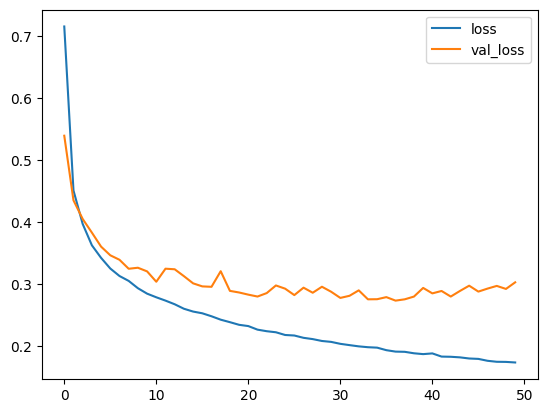

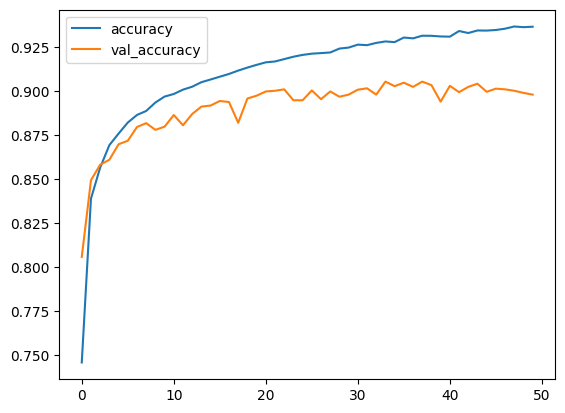

In [44]:
def render_history(history):
    assert isinstance(history, dict), f"Expected dict, but got {type(history)}"

    plt.plot(history["loss"], label="loss")
    plt.plot(history["val_loss"], label="val_loss")
    plt.legend()
    plt.show()

    plt.plot(history["accuracy"], label="accuracy")
    plt.plot(history["val_accuracy"], label="val_accuracy")
    plt.legend()

render_history(history.history)